In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import locale

# <span style="color:rgb(50,100,100);"><strong>&#128304; DATA SET POSTAL: VARIABLES PARA ANALIZAR &#128304;</strong></span>

<em> Con este set de información se pueden detectar las tendencias, el comportamiento de los clientes o los errores en las operaciones, de esta forma poder introducir soluciones a los procesos e, incluso, detectar nuevos negocios de cara al futuro. Analizar y predecir la tendencia en los tiempos de entrega, volumen y potencial crecimiento. Con la columna fecha_hora, se puede detectar y predecir  el pico de volumen que ingresara por dia y hora.</em> 


### <u style="color: rgb(50,50,100);"><span style="color:rgb(50,50,100);"><strong><em>CONSIGNA PASO A PASO VISUALIZACIONES </em></strong></span></u>

<span style= "color:black;">&#11093;Escoger uno de los 3 datasets utilizados para la Clase 5
    
&#11093;Cargar el dataset con la librería pandas por medio de la función pd.read_csv() o pd.read_excel()  

&#11093; Realizar al menos tres gráficos (lineplot, scatterplot, histogramas, barchart, boxplot) usando la librería Matplotlib
    
&#11093;Realizar al menos tres gráficos (lineplot, scatterplot, histogramas, barchart, boxplot) usando la librería Seaborn

&#11093;Interpretar los resultados de cada gráfica obtenida</span>


###### <span style="background-color: black;">-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

## <span style= "color:black;">&#9989; Carga de data set: Postal - Fuente: Personal + sintaxis utiles para calculos </span>

In [9]:
url_postal2022int='https://drive.google.com/file/d/1gpaF6HSvhXYo4cDyP1qzEGtw9qXcTcF-/view'
path_postal2022int= 'https://drive.google.com/uc?export=download&id='+ url_postal2022int.split('/')[-2]
postal=pd.read_csv(path_postal2022int, delimiter=";", encoding="latin-1", low_memory=False)
postal.shape

(114566, 50)

In [10]:
#modifico lo mal escrito
postal['destino_provincia']= postal['destino_provincia'].replace(["Buenos Aires"], ["BUENOS AIRES"])

#Agregar una columna 'valor_constante' con el valor 1 en cada fila
postal = postal.assign(valor_constante = 1)

# convierto la columna 'fecha' a tipo fecha la clono y luego creo otra con el datos solamente dd-mm-yy
postal['fecha_hora_clonada'] = postal['fecha_hora']
postal['fecha_hora_clonada'] = pd.to_datetime(postal['fecha_hora'])
postal['fecha_hora_clonada_ddmmyy'] = postal['fecha_hora_clonada'].dt.date

#creo columna con nombre de mes y nombre
postal['Month'] = pd.to_datetime(postal['fecha_hora_clonada']).dt.month_name()
postal['mes'] = pd.to_datetime(postal['fecha_hora_clonada']).dt.month

#creo columna con el dia de la fecha y nombre
postal['day'] = pd.to_datetime(postal['fecha_hora']).dt.day_name()
postal['dia'] = pd.to_datetime(postal['fecha_hora']).dt.day

# agrupo por zona destino
grouped_amba_int = postal.groupby(['fecha_hora_clonada_ddmmyy','destino_zona']).size().reset_index(name='cantidad_envios')

# Filtro las filas con envios al INTERIOR descartando AMBA
df_solo_interior = postal[postal['destino_zona'] == 'INT']

# Agrupo los datos por fecha y provincia
grouped = df_solo_interior.groupby(['fecha_hora_clonada_ddmmyy','destino_provincia']).size().reset_index(name='cantidad_envios')

# agrupo las filas por fecha y cuento el número de filas por fecha para obtener la cantidad de envio diarios
fechas_conteo = df_solo_interior.groupby(postal['fecha_hora_clonada'].dt.date).size()

In [11]:
postal["precio"] = postal["precio"].str.replace(',', '.')

In [37]:
postal["precio"] = postal["precio"].astype(float)
postal["precio"] = postal["bultos"].astype(int)


In [31]:
# agrupo por mes, dia y precio de venta
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
grouped_money = postal.groupby('mes')['precio'].sum()
total_precio = pd.DataFrame(grouped_money)
total_precio = total_precio.rename(columns={'precio':'precio_venta'})
total_precio["precio_venta"] = total_precio["precio_venta"].apply(lambda x: locale.currency(x, grouping=True))

In [32]:
df_pivot = postal.pivot_table(index='Month', columns='day', values='precio', aggfunc='mean')
df_pivot = pd.DataFrame(df_pivot)
#df_pivot = df_pivot.applymap(lambda x: locale.currency(x, grouping=True))
df_pivot = df_pivot[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_pivot = df_pivot.reindex(months)
df_pivot = df_pivot.astype(float)
df_pivot = np.round(df_pivot, 2)


## <span style= "color:black;">&#9989; Realizar al menos tres gráficos (lineplot, scatterplot, histogramas, barchart, boxplot) usando la librería Matplotlib
 </span>

#### <span> &#11093;  En esta linea de tiempo se puede evaluar como fue fluctuando la cantidad de envios por provincia en el año, de esta forma se podria predecir la tendencia para el año proximo </span>

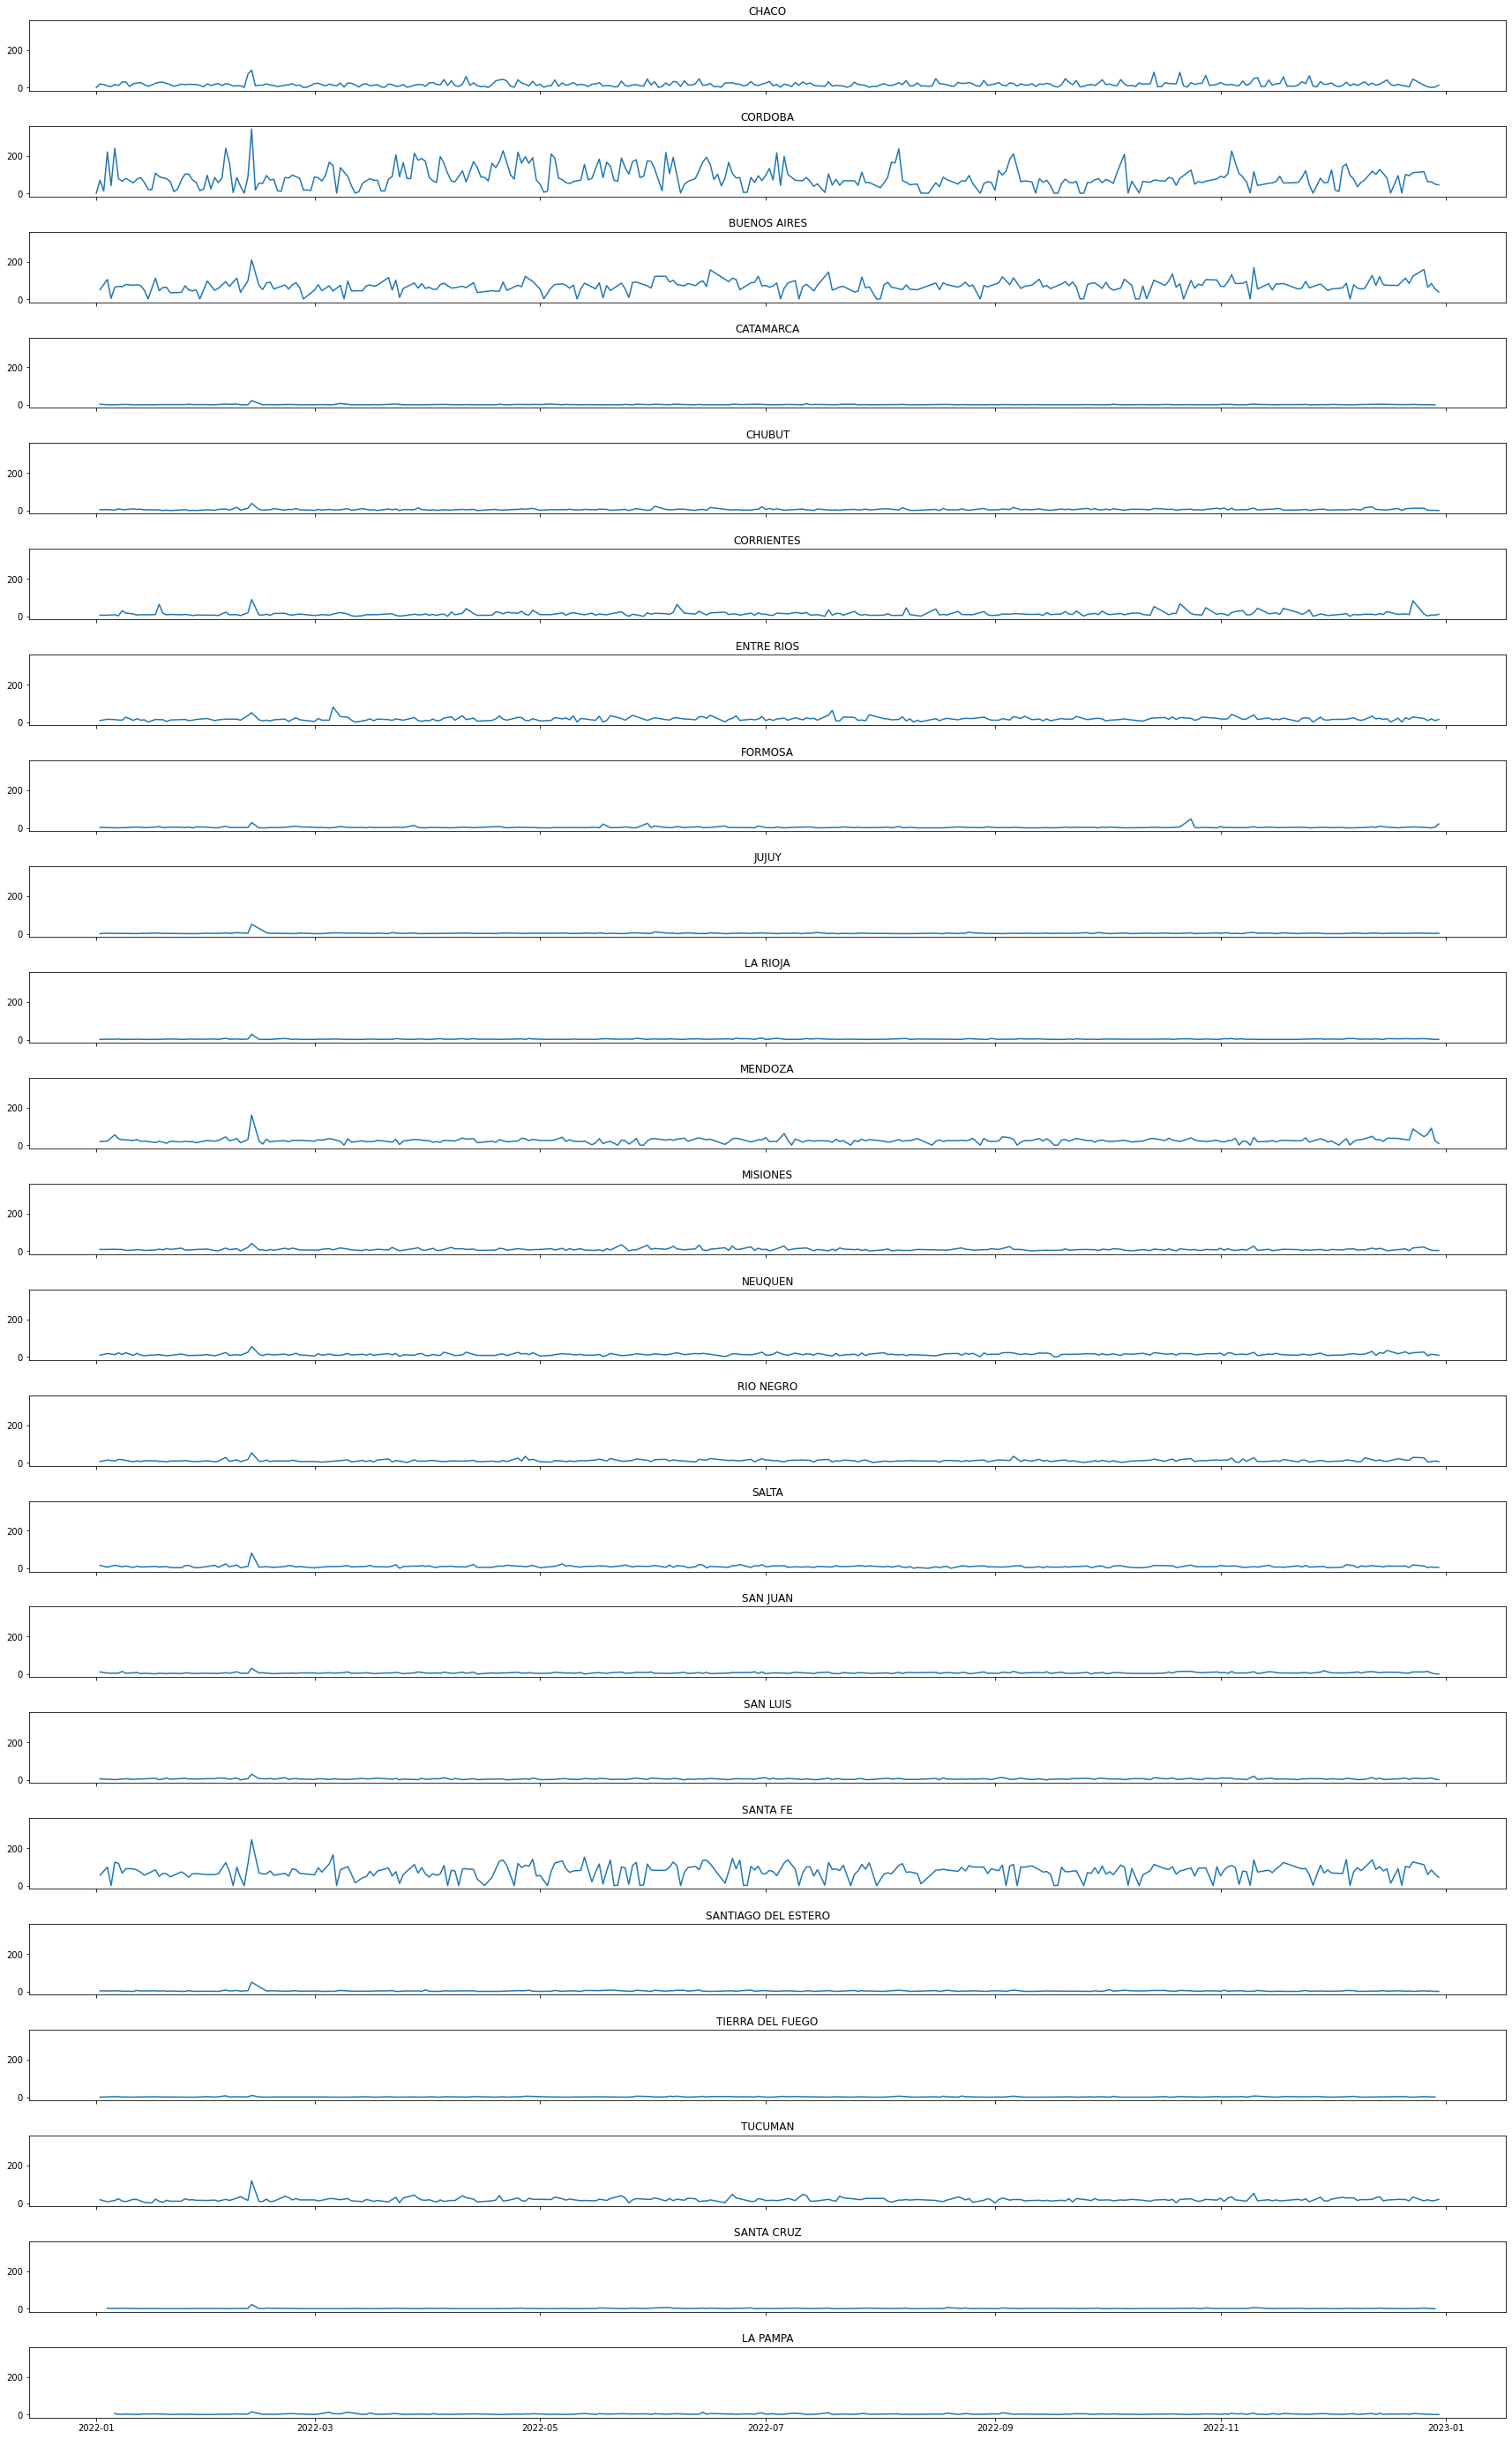

In [33]:
#Creo un subplot por cada provincia
provincias = grouped['destino_provincia'].unique()
fig, ax = plt.subplots(nrows=len(provincias), ncols=1, figsize=(30,50), sharex=True, sharey=True)

for i, prov in enumerate(provincias):    
    prov_df = grouped[grouped['destino_provincia'] == prov]
    ax[i].plot(prov_df['fecha_hora_clonada_ddmmyy'], prov_df['cantidad_envios'])
    ax[i].set_title(prov)

fig.subplots_adjust(wspace=0.8, hspace=0.5)

#Muestro el plot
plt.show()


#### <span> &#11093;  En histograma se puede evaluar la fluctuacion general en el año en la cantidad de envios hacia el interior del pais, se puede ver que la tendencia en aumento es a fin de año con picos a mitad de año lo cual premitiria proyectar la capacidad de personal para el año siguiente. </span>

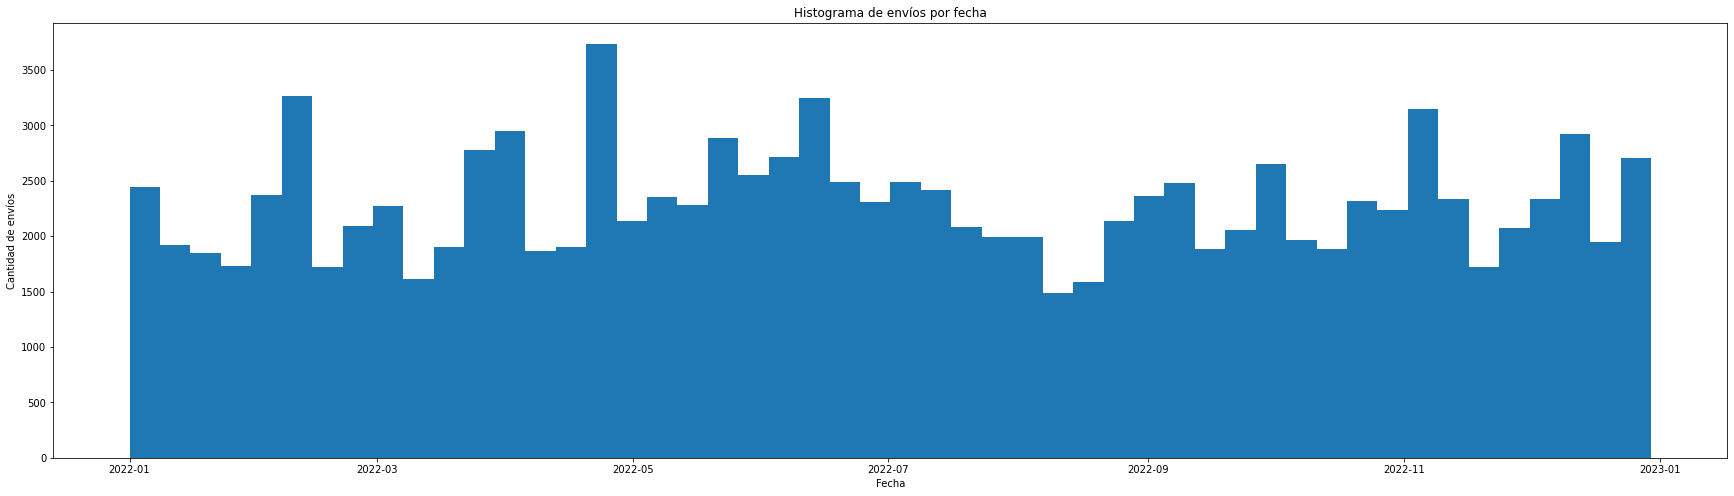

In [34]:
# creo el histograma
plt.figure(figsize=(30, 8))
plt.hist(fechas_conteo.index, weights=fechas_conteo.values, bins=50)

# personalizo el histograma
plt.xlabel('Fecha')
plt.ylabel('Cantidad de envíos')
plt.title('Histograma de envíos por fecha')

# muestro el histograma
plt.show()

#### <span> &#11093;  En esta scatterplot se pueden apreciar que provincia patea mas alto, en resumidasd cuentas quien mueve mayor cantidad de bultos promedio. </span>

In [52]:
print(postal.dtypes)

id                                     int64
cliente_id                             int64
Empresa                               object
tipo_operacion                        object
tipo_operacion_nombre                 object
fecha_hora                            object
fechaplanilla                         object
fecharendicion                        object
fecha_hora_entrega                    object
fechaUltimoEstado                     object
fecha_ultimo_estado                   object
servicio_codigo                       object
servicio                              object
grupo                                 object
codigo_estado                         object
estado                                object
peso                                  object
bultos                                 int64
bulto_por_peso_final                  object
peso_volumetrico                      object
kg_exceso                              int64
precio                                 int64
costo_dist

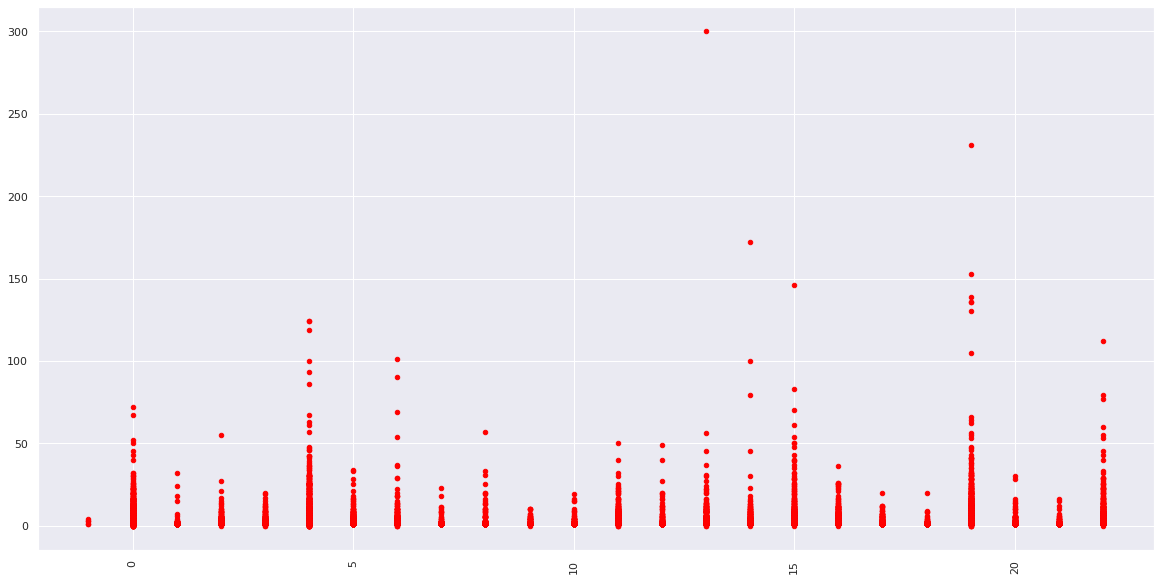

In [45]:
#creo las variables x y
postal['destino_provincia'] = postal['destino_provincia'].astype('category')
#x=postal["destino_provincia"]
x=postal["destino_provincia"].cat.codes
y=postal["bultos"]

#personalizo la hoja de trabajo

plt.figure(figsize=(20,10))
plt.scatter (x, y, s=20, c='red')             
plt.xticks(rotation=90, ha='center')

#muestro el scatter
plt.show()

## <span style= "color:black;">&#9989;Realizar al menos tres gráficos (lineplot, scatterplot, histogramas, barchart, boxplot) usando la librería Seaborn</san>

#### <span> &#11093;  En esta scatterplot se pueden apreciar que provincia patea mas alto, en resumidasd cuentas quien mueve mayor cantidad de bultos promedio, y con la ayuda de seaborn podemos distinguir a que mes corresponde cada pelota y de esa forma predecir la tendencia de cada provincia. </span>

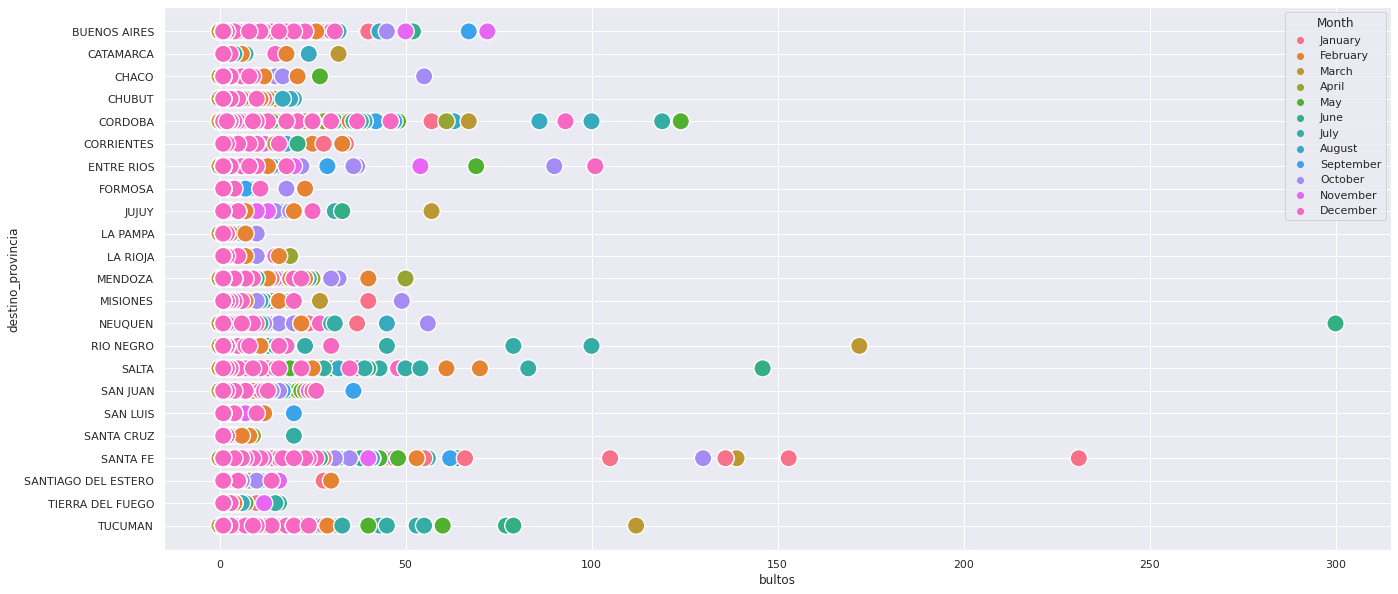

In [38]:
x=postal["destino_provincia"]
y=postal["bultos"]
sns.set(rc={'figure.figsize':(22,10)})
sns.scatterplot(data=postal, y='destino_provincia', x='bultos',  hue='Month',  s=300, c='red')

plt.xticks(rotation=00, ha='center')
plt.show()

#### <span> &#11093; En este Histplot el acumulado de envios por dia de la semana a lo largo del año, de esta forma poder entender y ver como se comportan cada dia.  </span>

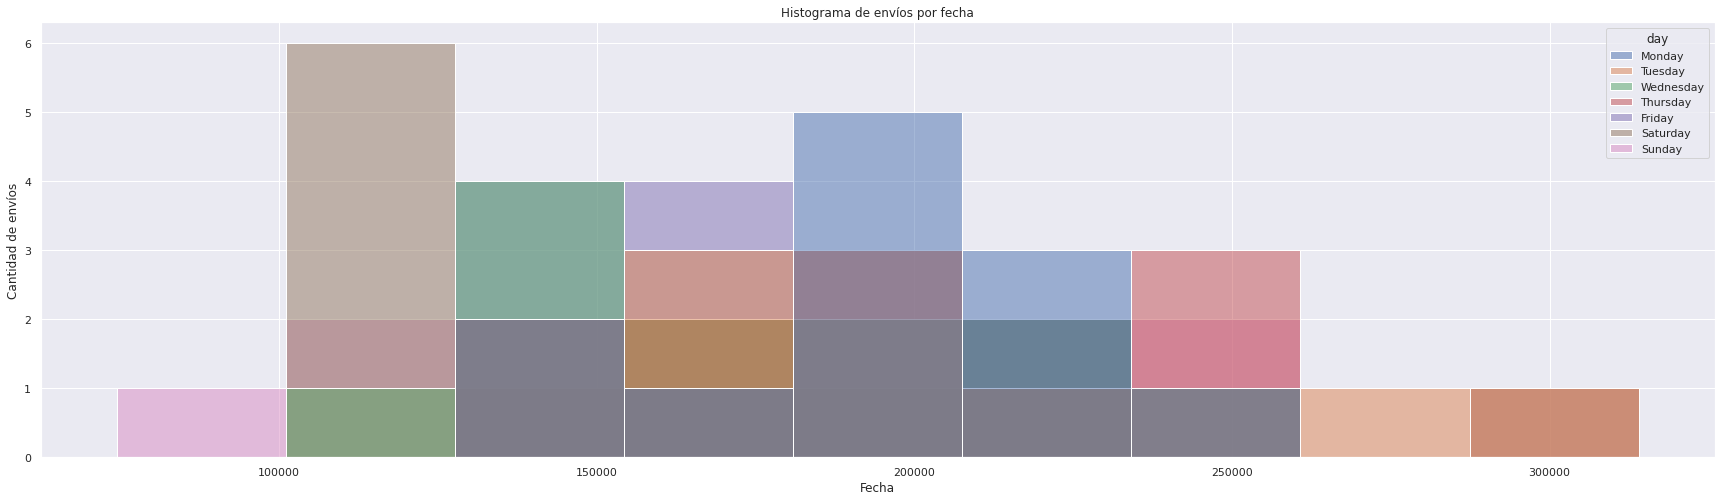

In [ ]:
sns.set(rc={'figure.figsize':(30, 8)})
sns.histplot(data=df_pivot)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de envíos')
plt.title('Histograma de envíos por fecha')
plt.show()

#### <span> &#11093; Los graficos siguientes  Heatmap, Lineplot y Boxplot estan basados en el DF(df_pivot)

&#11093; En orden decendente el primer mes inicia con la 1er fila superior llegando hasta diciembre en la ultima fila, cada columna corresponde al dia de la semana. Podemos ver como se comporta cada dia durante el mes y año.
 </span>

In [48]:
df_pivot.head

<bound method NDFrame.head of day        Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Month                                                                    
January      1.64     2.24       1.53      1.47    1.48      1.35    1.44
February     1.66     1.75       1.53      1.45    1.69      1.55    1.53
March        1.65     1.60       1.55      1.69    1.55      1.57    1.41
April        1.51     1.47       1.44      1.58    1.45      1.62    1.63
May          1.88     1.65       1.70      1.62    1.38      1.73    1.76
June         1.55     1.52       1.47      1.61    1.66      1.50    1.63
July         1.46     1.57       1.54      1.59    1.40      1.98    2.12
August       1.47     1.49       1.42      1.57    1.64      1.56    1.46
September    1.51     1.51       1.45      1.46    1.49      1.19    1.83
October      1.55     1.68       1.57      1.71    1.42      1.66    1.83
November     1.46     1.45       1.65      1.54    1.37      1.68    2.06
December

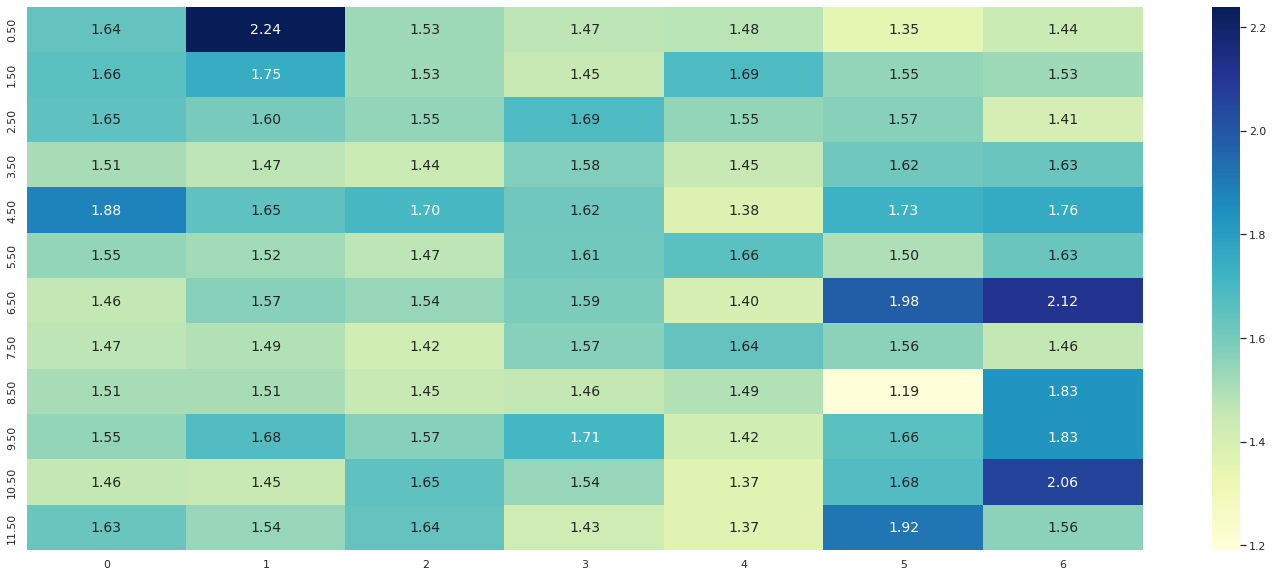

In [49]:
df_pivot_matrix = df_pivot.values
import matplotlib.ticker as ticker
sns.set(rc={'figure.figsize':(25,10)})
sns.heatmap(df_pivot_matrix, annot=True, cmap='YlGnBu', annot_kws={"size": 14, 'ha': 'center', 'va': 'center'}, fmt='.2f')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#### <span> &#11093; Mostramos el precio acumulado por dia, con el fin de ver los dias que mayor facturacion generan  </span>

Text(0.5, 1.0, 'PRECIO ACUMULADO POR DIA DE LA SEMANA')

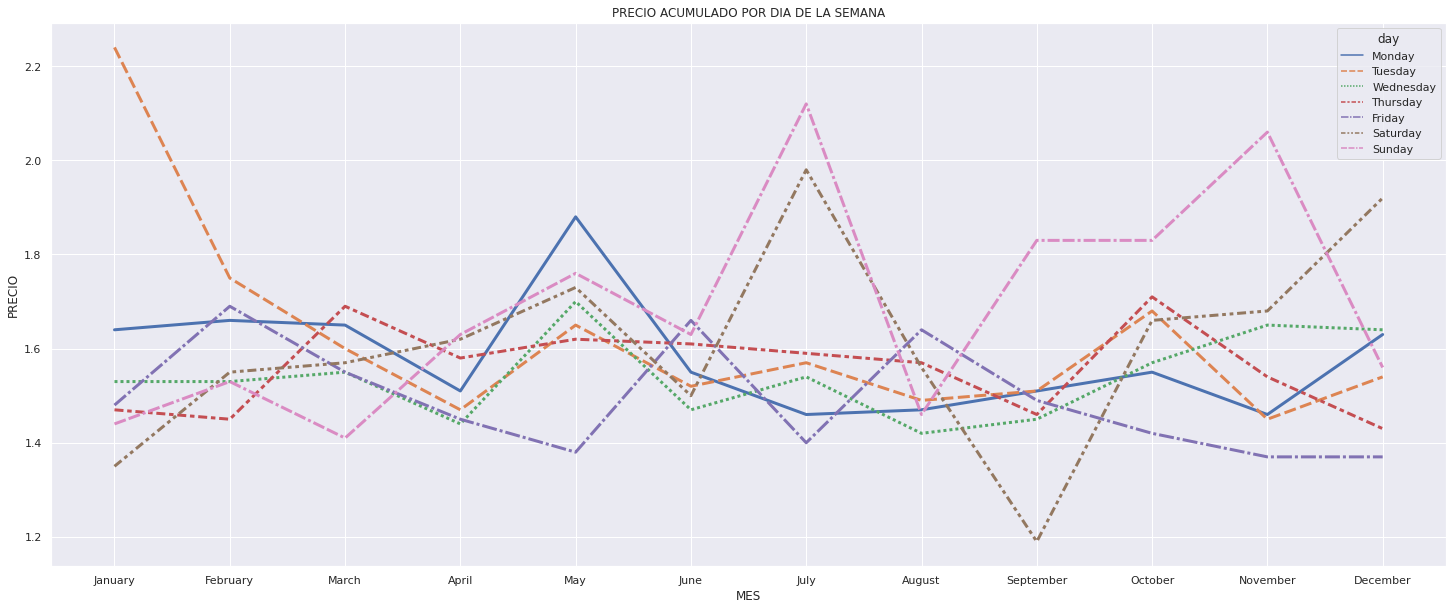

In [50]:
sns.set(rc={'figure.figsize':(25,10)})
sns.lineplot(data=df_pivot, lw=3)
plt.xlabel('MES')
plt.ylabel('PRECIO')
plt.title('PRECIO ACUMULADO POR DIA DE LA SEMANA')

#### <span> &#11093; En este Boxplot podemos ver los maximos, minimos y cuartiles de cada dia de la semana en un historico anual  </span>

Text(0.5, 1.0, 'PRECIO ACUMULADO POR DIA DE LA SEMANA')

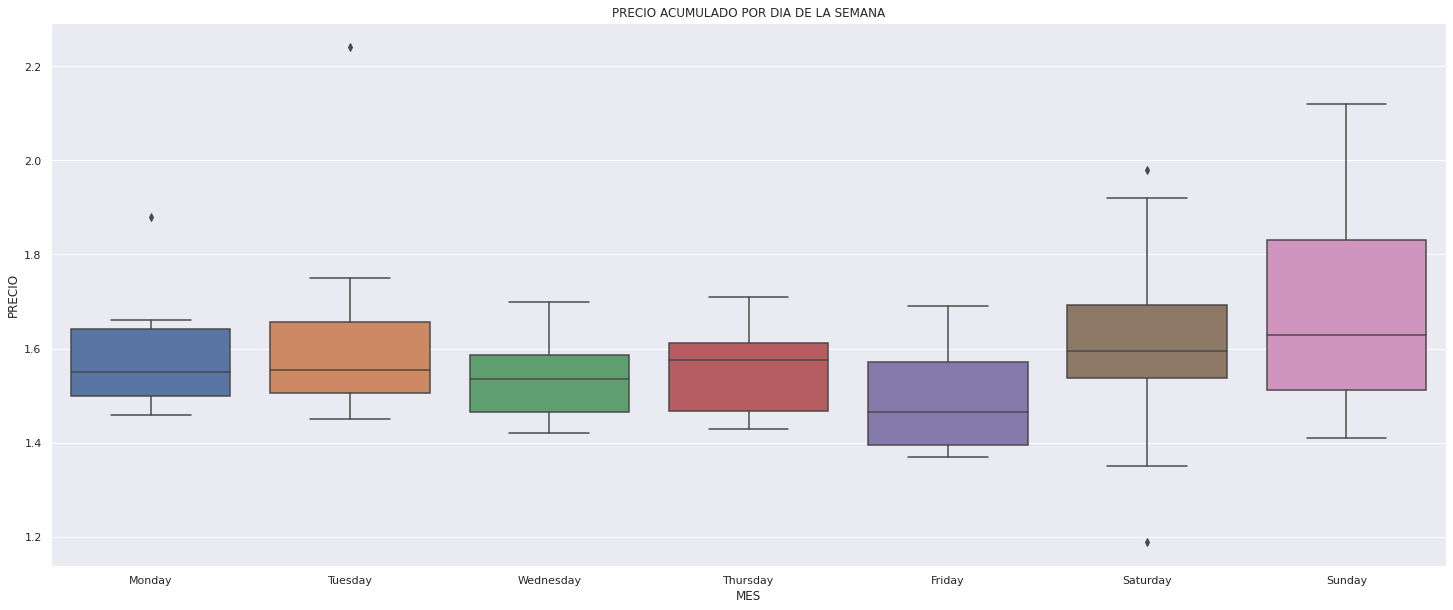

In [51]:
sns.set(rc={'figure.figsize':(25,10)})
sns.boxplot(data=df_pivot)
plt.xlabel('MES')
plt.ylabel('PRECIO')
plt.title('PRECIO ACUMULADO POR DIA DE LA SEMANA')